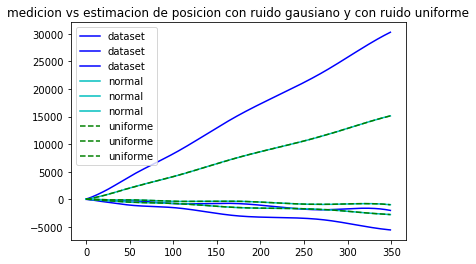

<Figure size 432x288 with 0 Axes>

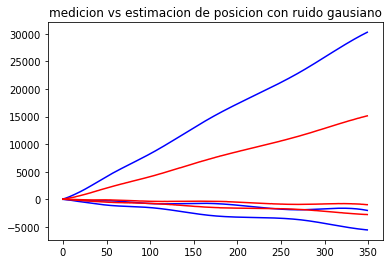

<Figure size 432x288 with 0 Axes>

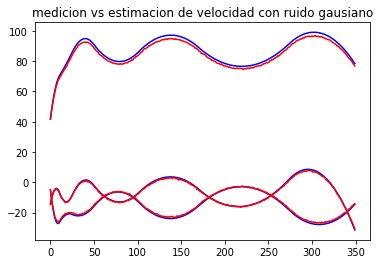

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def carga_archivo (path):
    data =  np.loadtxt(path)
    return data
    
#Filtro Kalman

#II.1. Prediction Step

#This step has to predict the mean X and the covariance P of the system state at the
#time step k . The Python function kf_predict performs the prediction of these
#output ( X and P ) when giving six input:

#II.2. Update Step

#At the time step k , this update step computes the posterior mean X and covariance
#P of the system state given a new measurement Y . The Python function kf_update
#performs the update of X and P giving the predicted X and P matrices, the
#measurement vector Y , the measurement matrix H and the measurement covariance
#matrix R. The additional input will be:

#K : the Kalman Gain matrix
    #IM : the Mean of predictive distribution of Y
    #IS : the Covariance or predictive mean of Y
    #LH : the Predictive probability (likelihood) of measurement which is computed using the Python function gauss_pdf.

    
class Kalman(object):

    def kf_predict(self,X, P, A, Q, B):   
        X = np.dot(A, X) 
        P= np.dot(A, np.dot(P, A.T)) + np.dot(B,np.dot(Q,B.T))
        return X,P

    def kf_update(self,X, P, Y, C, R):
        IM = np.dot(C, X)
        IS = R + np.dot(C, np.dot(P, C.T))#inversa 
        K = np.dot(P, np.dot(C.T, np.linalg.inv((IS))))#K
        X = X + np.dot(K,(Y-IM))
        P=np.dot((np.eye(9)-np.dot(K,C)),P)
        return X,P    



#-------------------------------------------------------------------------------------------------------------------------

if __name__ == '__main__':
    
    pos =  carga_archivo(r'C:\Users\Dicsys\Downloads\posicion.dat')
    ace =  carga_archivo(r'C:\Users\Dicsys\Downloads\aceleracion.dat')
    vel =  carga_archivo(r'C:\Users\Dicsys\Downloads\velocidad.dat')
    

    
#delta time
dt = 1

# Initialization of state matrices (del proceso)
#X : The mean state estimate of the previous step ( k n -1 ).
#P : The state covariance of previous step ( k en n-1 ).
#A : The transition n n× matrix.
#Q : The process noise covariance matrix.
#B : The input effect matrix.


A=np.zeros((9,9))
A[0:3,0:3]= np.eye(3)
A[0:3,3:6]=dt*np.eye(3)
A[0:3,6:9]=(np.power(dt,2)/2)*np.eye(3)
A[3:6,3:6]=np.eye(3)
A[3:6,6:9]=dt*np.eye(3)
A[6:9,6:9]=np.eye(3)



X = np.array([[10.7533], [36.6777], [-45.1769], [1.1009],[-17.0],[35.7418],[-5.7247],[3.4268],[5.2774]]) # X0/0
B = np.eye(X.shape[0])
P = np.diag([100,100,100,1,1,1,0.01, 0.01, 0.01])# P0/0
Q = 0.3*np.eye(X.shape[0])
R =100.0*np.eye(3)


# Measurement matrices (mediciones)

Y = pos
C = np.zeros((3,9)) #matriz C de la innovacion
C[0,0]=1
C[1,1]=1
C[2,2]=1


#_______________________________________________punto a___________________________________________________________

# Number of iterations in Kalman Filter

N_iter = 350
c=Kalman()

# Applying the Kalman Filter

salidaN=np.zeros((N_iter+1,9))
for i in range(0, N_iter):
    [XN, PN] = c.kf_predict(X, P, A, Q, B)
    Y=pos[i+1,1:4]+np.random.normal(0,10,3)
    Y=Y.reshape(-1,1)
    (XN, PN) = c.kf_update(X, P, Y, C, R)
    salidaN[i+1,:]=XN.T

#print(pos[1:,1:4])    
#print(salidaN[1:,0:3])
#error_normal_noise=pos[1:,1:4]-salidaN[1:,0:3]



#_______________________________________________punto b___________________________________________________________
  
salidaU=np.zeros((N_iter+1,9))
for i in range(0, N_iter):
    [XU, PU] = c.kf_predict(X, P, A, Q, B)
    Y=pos[i+1,1:4]+np.random.uniform(0,10,3)
    Y=Y.reshape(-1,1)
    (XU, PU) = c.kf_update(X, P, Y, C, R)
    salidaU[i+1,:]=XU.T
    
#print(pos[1:,1:4]) 
#print(salidaU[1:,0:3])
#print(pos[1:,1:4]-salidaU[1:,0:3] )

#_______________________________________________punto c___________________________________________________________

R2 = np.zeros((6,6)) #matriz C de la innovacion
R2[0,0]=100
R2[1,1]=100
R2[2,2]=100
R2[3,3]=0.04
R2[4,4]=0.04
R2[5,5]=0.04

C2 = np.zeros((6,9)) #matriz C de la innovacion
C2[0,0]=1
C2[1,1]=1
C2[2,2]=1
C2[3,3]=1
C2[4,4]=1
C2[5,5]=1


salidaV=np.zeros((N_iter+1,9))
for i in range(0, N_iter):
    [XV, PV] = c.kf_predict(X, P, A, Q, B)
    Y1= np.zeros((6,1))
    Y1[0]=pos[i+1,1]+np.random.normal(0,10,1)
    Y1[1]=pos[i+1,2]+np.random.normal(0,10,1)
    Y1[2]=pos[i+1,3]+np.random.normal(0,10,1)
    Y1[3]=vel[i+1,1]+np.random.normal(0,0.2,1)
    Y1[4]=vel[i+1,2]+np.random.normal(0,0.2,1)
    Y1[5]=vel[i+1,3]+np.random.normal(0,0.2,1)
    (XV, PV) = c.kf_update(X, P, Y1, C2, R2)
    salidaV[i+1,:]=XV.T

#print(pos[1:,1:4]) 
#print(salidaV[1:,0:3])
#print(pos[1:,1:4]-salidaU[1:,0:3] )

#-----------plot medicion posicion vs salida con ruido gausiano y con ruido uniforme (puntos a y b)
plt.figure() 
plt.plot(pos[1:,1:4], color='b', label='dataset')
plt.plot(salidaN[1:,0:3], color='c', label='normal')
plt.plot(salidaU[1:,0:3],'g--',label='uniforme')
plt.title("medicion vs estimacion de posicion con ruido gausiano y con ruido uniforme")
plt.figure(3)   # Activa el gráfico 3


#-----------plot medicion posicion vs salida con ruido gausiano (punto c)
plt.figure() 
plt.plot(pos[1:,1:4],color='b', label='dataset')
plt.plot(salidaV[1:,0:3], color='r', label='normal')
plt.title("medicion vs estimacion de posicion con ruido gausiano")
plt.figure(2)   # Activa el gráfico 2


#-----------plot medicion velocidad vs salida con ruido gausiano (punto c)


plt.figure()   #  Añade un nuevo gráfico y lo activa
plt.plot(vel[1:,1:4],color='b', label='dataset')
plt.plot(salidaV[1:,3:6], color='r', label='normal')
plt.title("medicion vs estimacion de velocidad con ruido gausiano")
plt.figure(1)   # Activa el gráfico 1


plt.legend()
plt.show()

